In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

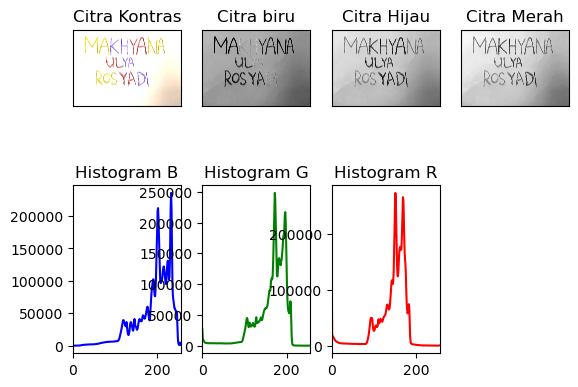

In [2]:
image = cv2.imread('bahan2.jpg')

alpha = 1.5
beta = 50
contrast_image = cv2.convertScaleAbs(image, alpha = alpha, beta=beta)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
R, G, B = cv2.split(image_rgb)

images = [contrast_image, R, G, B]
titles = ['Citra Kontras', 'Citra biru', 'Citra Hijau', 'Citra Merah']
for i in range(4) :
    plt.subplot(2, 4, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

color = ('b', 'g', 'r')
for i, col in enumerate(color):
    plt.subplot(2, 4, i+5)
    histr = cv2.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
    plt.title('Histogram ' + col.upper())

plt.show()

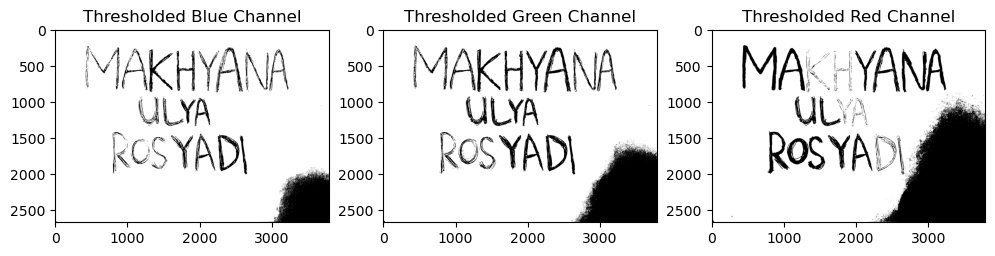

In [12]:
# Membaca citra
img = cv2.imread('Bahan2.jpg')

# Mengubah citra ke ruang warna RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Membagi citra menjadi channel warna R, G, dan B
r, g, b = cv2.split(img_rgb)

# Membuat list untuk menyimpan citra threshold
thresh_images = []
titles = ['Red-Green-Blue', 'Blue', 'None', 'Red-Blue']

# Melakukan thresholding untuk setiap kondisi
for i, channel in enumerate([img, b, r-b, r-g-b]):
    # Menghitung histogram
    hist = cv2.calcHist([channel], [0], None, [256], [0,256])

    # Mencari nilai ambang batas
    thresholds = []
    for i in range(1, 255):
        if hist[i-1] < hist[i] and hist[i+1] < hist[i]:
            thresholds.append(i)

    # Mengurutkan nilai ambang batas
    thresholds.sort()

  # Calculate the threshold values for each color channel
ret, b_thresh = cv2.threshold(b, 127, 255, cv2.THRESH_BINARY)
ret, g_thresh = cv2.threshold(g, 127, 255, cv2.THRESH_BINARY)
ret, r_thresh = cv2.threshold(r, 127, 255, cv2.THRESH_BINARY)

# Display the thresholded images
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(b_thresh, cmap='gray')
plt.title('Thresholded Blue Channel')
plt.subplot(132)
plt.imshow(g_thresh, cmap='gray')
plt.title('Thresholded Green Channel')
plt.subplot(133)
plt.imshow(r_thresh, cmap='gray')
plt.title('Thresholded Red Channel')
plt.show()